<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Patching for drone_detector.data classes

In [1]:
#|output: asis
#| echo: false
show_doc(RegressionMask.affine_coord)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/engines/fastai/augmentations.py#L14){target="_blank" style="float:right; font-size:smaller"}

### RegressionMask.affine_coord

>      RegressionMask.affine_coord
>                                   (x:drone_detector.engines.fastai.data.Regres
>                                   sionMask, mat=None, coord_tfm=None, sz=None,
>                                   mode='nearest', pad_mode='reflection',
>                                   align_corners=True)

RegressionMask can't be `long` type

## AlbumentationsTransform

In [2]:
#|output: asis
#| echo: false
show_doc(AlbumentationsTransform)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/engines/fastai/augmentations.py#L24){target="_blank" style="float:right; font-size:smaller"}

### AlbumentationsTransform

>      AlbumentationsTransform (train_aug, valid_aug=None)

A transform handler for multiple `Albumentation` transforms in simple classification or regression tasks.

## SegmentationAlbumentationsTransform

In [3]:
#|output: asis
#| echo: false
show_doc(SegmentationAlbumentationsTransform)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/engines/fastai/augmentations.py#L50){target="_blank" style="float:right; font-size:smaller"}

### SegmentationAlbumentationsTransform

>      SegmentationAlbumentationsTransform (aug)

A transform handler for `Albumentation` transforms for segmentation tasks.

In [ ]:
path = Path('example_data/monthly_data')
month='july'

fnames = [path/f'{month}/{f}' for f in os.listdir(path/f'{month}') if f.endswith('.tif')][:2]

In [ ]:
transform_list = [A.ToFloat(max_value=65535.0, always_apply=True),
                  A.RandomBrightnessContrast(p=0.5,brightness_limit=.05, brightness_by_max=False),
                  A.RandomRotate90(p=1),
                  A.HorizontalFlip(p=.5),
                  A.VerticalFlip(p=.5),
                  A.CoarseDropout(),
                  A.FromFloat(max_value=65535.0, dtype=np.int16, always_apply=True)
                 ]

In [ ]:
used_tfms =  SegmentationAlbumentationsTransform(A.Compose(transform_list))

In [ ]:
segm = TifSegmentationDataLoaders.from_label_func(path/f'{month}_2018', fnames, y_block=RegressionMaskBlock,
                                                  label_func=partial(label_with_matching_fname, 
                                                                     path=path/'masks'),
                                                  batch_tfms = [
                                                      #Normalize.from_stats(*stats)
                                                  ],
                                                  item_tfms = [used_tfms], 
                                                  bs=1)

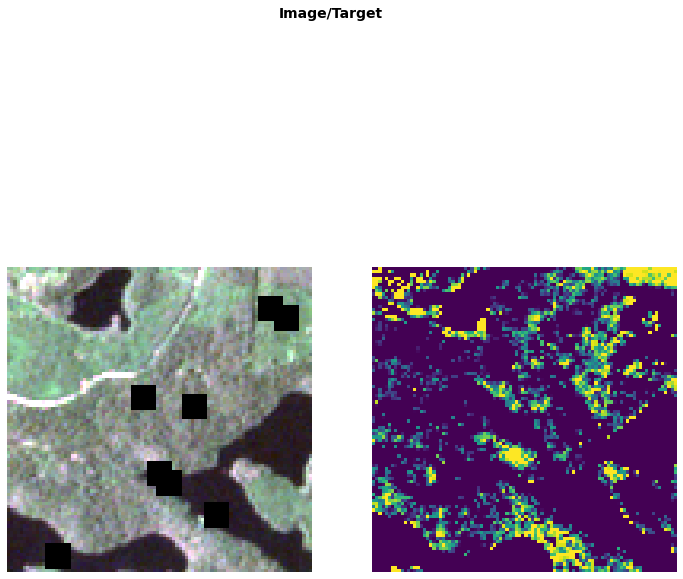

In [ ]:
segm.show_batch(channels=[3,2,1])

In [ ]:
files = get_image_timeseries(path, 
                             months=['may', 'june', 'july', 'august', 'september', 'october'], masks='masks')

In [ ]:
dblock = DataBlock(blocks=(MultiChannelImageTupleBlock, 
                           RegressionMaskBlock),
                   get_items=lambda x: x,
                   get_x=get_all_but_last, get_y=get_last,
                   item_tfms=[
                       used_tfms
                   ],
                   batch_tfms=[ 
                   ])

In [ ]:
dls = dblock.dataloaders(files[:1], bs=1)

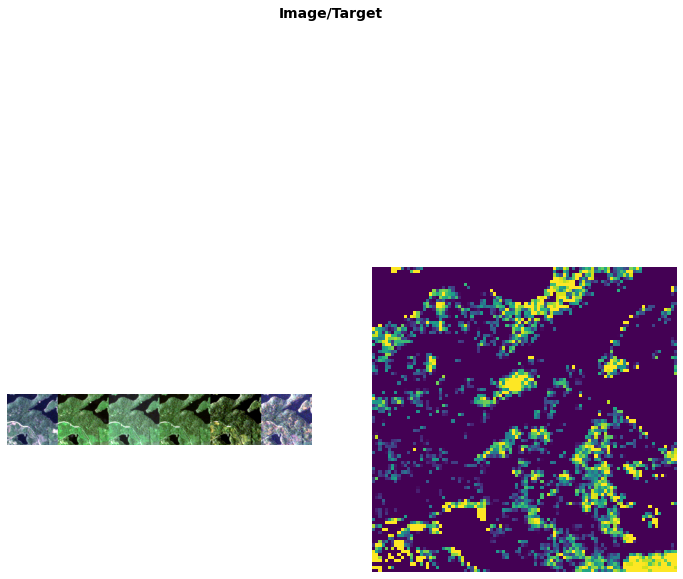

In [ ]:
dls.show_batch(channels=[3,2,1])

## Utils functions